In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import datetime
import matplotlib.dates as mdates


In [2]:
from google.colab import files
uploaded = files.upload()

Saving 2011_smd_hourly.xls to 2011_smd_hourly.xls
Saving 2012_smd_hourly.xls to 2012_smd_hourly.xls
Saving 2013_smd_hourly.xls to 2013_smd_hourly.xls
Saving 2014_smd_hourly.xls to 2014_smd_hourly.xls
Saving 2015_smd_hourly.xls to 2015_smd_hourly.xls
Saving 2016_smd_hourly.xls to 2016_smd_hourly.xls
Saving 2017_smd_hourly.xlsx to 2017_smd_hourly.xlsx
Saving 2018_smd_hourly.xlsx to 2018_smd_hourly.xlsx
Saving 2019_smd_hourly.xlsx to 2019_smd_hourly.xlsx
Saving 2020_smd_hourly.xlsx to 2020_smd_hourly.xlsx
Saving 2021_smd_hourly.xlsx to 2021_smd_hourly.xlsx
Saving 2022_smd_hourly.xlsx to 2022_smd_hourly.xlsx
Saving 2023_smd_hourly.xlsx to 2023_smd_hourly.xlsx


In [8]:
file_names = [
    "2011_smd_hourly.xls",
    "2012_smd_hourly.xls",
    "2013_smd_hourly.xls",
    "2014_smd_hourly.xls",
    "2015_smd_hourly.xls",
    "2016_smd_hourly.xls",
    "2017_smd_hourly.xlsx",
    "2018_smd_hourly.xlsx",
    "2019_smd_hourly.xlsx",
    "2020_smd_hourly.xlsx",
    "2021_smd_hourly.xlsx",
    "2022_smd_hourly.xlsx",
    "2023_smd_hourly.xlsx"
]

In [87]:
for file_name in file_names:
    year = int(file_name[:4])
    if year <= 2015:
        desired_sheet_name = "NEMASSBOST"
    else:
        desired_sheet_name = "NEMA"
    globals()[f"df_{year}"] = pd.read_excel(file_name, sheet_name=desired_sheet_name)

for year in range(2011, 2024):
    df = globals()[f"df_{year}"]
    if "DEMAND" in df.columns:
        df["DEMAND_VALUE"] = df["DEMAND"]
    elif "RT_Demand" in df.columns:
        df["DEMAND_VALUE"] = df["RT_Demand"]

In [88]:
energydf = pd.concat([df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019, df_2020, df_2021, df_2022, df_2023], ignore_index=True)
energydf['DAY'] = energydf['Date'].dt.dayofyear
energydf['WEEK'] = energydf['Date'].dt.week

<ipython-input-88-8940618649f7>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  energydf['WEEK'] = energydf['Date'].dt.week


In [89]:
new_energydf = energydf[['Date', 'DEMAND_VALUE']].copy()
new_energydf['DAY'] = new_energydf['Date'].dt.dayofyear
new_energydf['WEEK'] = new_energydf['Date'].dt.isocalendar().week
new_energydf = new_energydf.groupby(['Date', 'DAY', 'WEEK']).sum().reset_index()
new_energydf

,Date,DAY,WEEK,DEMAND_VALUE
0,2011-01-01,1,52,61889.000
1,2011-01-02,2,52,62619.000
2,2011-01-03,3,1,73043.000
3,2011-01-04,4,1,75229.000
4,2011-01-05,5,1,74949.000
...,...,...,...,...
4529,2023-05-27,147,21,50811.502
4530,2023-05-28,148,21,55377.778
4531,2023-05-29,149,22,52984.896
4532,2023-05-30,150,22,54427.944


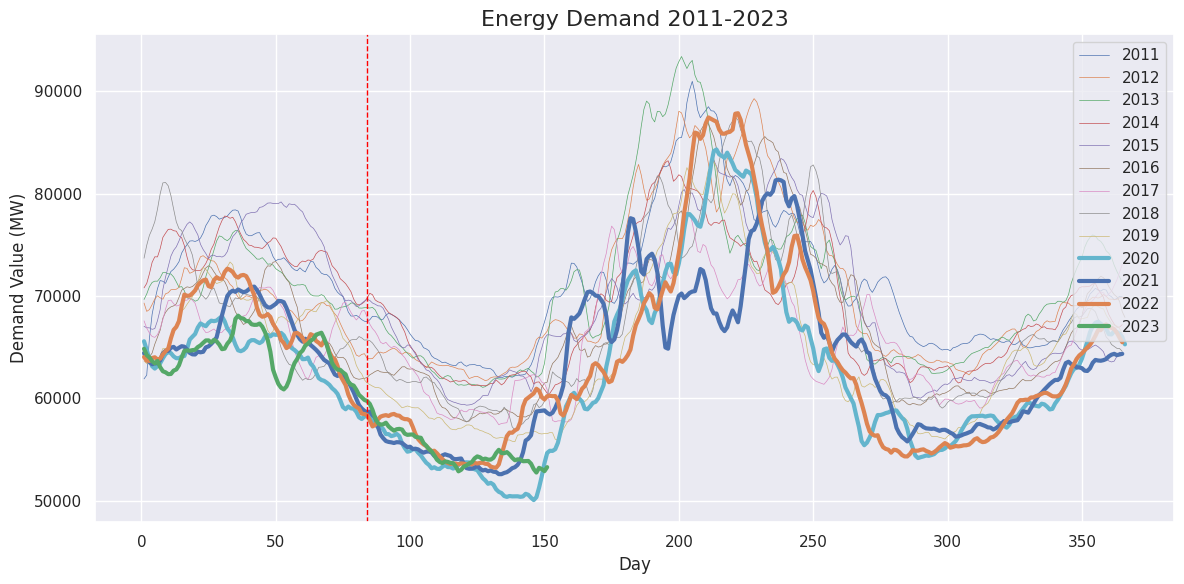

In [113]:
sns.set(style='darkgrid')

new_energydf['Year'] = new_energydf['Date'].dt.year

new_energydf['Demand_Rolling_Avg'] = new_energydf['DEMAND_VALUE'].rolling(window=14, min_periods=1).mean()

plt.figure(figsize=(12, 6))
for year in new_energydf['Year'].unique():
    year_data = new_energydf[new_energydf['Year'] == year]
    if year >= 2020:
        plt.plot(year_data['DAY'], year_data['Demand_Rolling_Avg'], label=str(year), linewidth=3)
    else:
        plt.plot(year_data['DAY'], year_data['Demand_Rolling_Avg'], label=str(year), linewidth=.5)

plt.axvline(x=84, color='red', linestyle='--', linewidth=1)

plt.title('Energy Demand 2011-2023', fontsize=16)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Demand Value (MW)', fontsize=12)

plt.legend()

plt.tight_layout()
plt.show()



In [112]:
from google.colab import files
uploaded = files.upload()

Saving All Pollutants Daily AQI Values 2010 to 2023 - Essex County.csv to All Pollutants Daily AQI Values 2010 to 2023 - Essex County.csv
Saving All Pollutants Daily AQI Values 2010 to 2023 - Middlesex County.csv to All Pollutants Daily AQI Values 2010 to 2023 - Middlesex County.csv
Saving All Pollutants Daily AQI Values 2010 to 2023 - Suffolk County.csv to All Pollutants Daily AQI Values 2010 to 2023 - Suffolk County.csv


In [114]:
essexdf = pd.read_csv('All Pollutants Daily AQI Values 2010 to 2023 - Essex County.csv')
middlesexdf = pd.read_csv('All Pollutants Daily AQI Values 2010 to 2023 - Middlesex County.csv')
suffolkdf = pd.read_csv('All Pollutants Daily AQI Values 2010 to 2023 - Suffolk County.csv')

In [116]:
essexdf['County'] = 'Essex County'
middlesexdf['County'] = 'Middlesex County'
suffolkdf['County'] = 'Suffolk County'

In [129]:
combined_df = pd.concat([essexdf, middlesexdf, suffolkdf], ignore_index=True)

In [ ]:
countydf = combined_df.groupby('Date')[' AQI Value'].mean().reset_index()
countydf

In [143]:
countydf['Date'] = pd.to_datetime(countydf['Date'], format='%m/%d/%Y')

energyaqidf = new_energydf.merge(countydf, on='Date', how='inner')

energyaqidf = energyaqidf[['Date', 'DEMAND_VALUE', ' AQI Value']]

In [144]:
energyaqidf

,Date,DEMAND_VALUE,AQI Value
0,2011-01-01,61889.000,64.000000
1,2011-01-02,62619.000,61.000000
2,2011-01-03,73043.000,38.333333
3,2011-01-04,75229.000,48.666667
4,2011-01-05,74949.000,46.666667
...,...,...,...
4529,2023-05-27,50811.502,46.000000
4530,2023-05-28,55377.778,57.333333
4531,2023-05-29,52984.896,45.666667
4532,2023-05-30,54427.944,41.000000


Correlation Coefficient: 0.38227734720020823


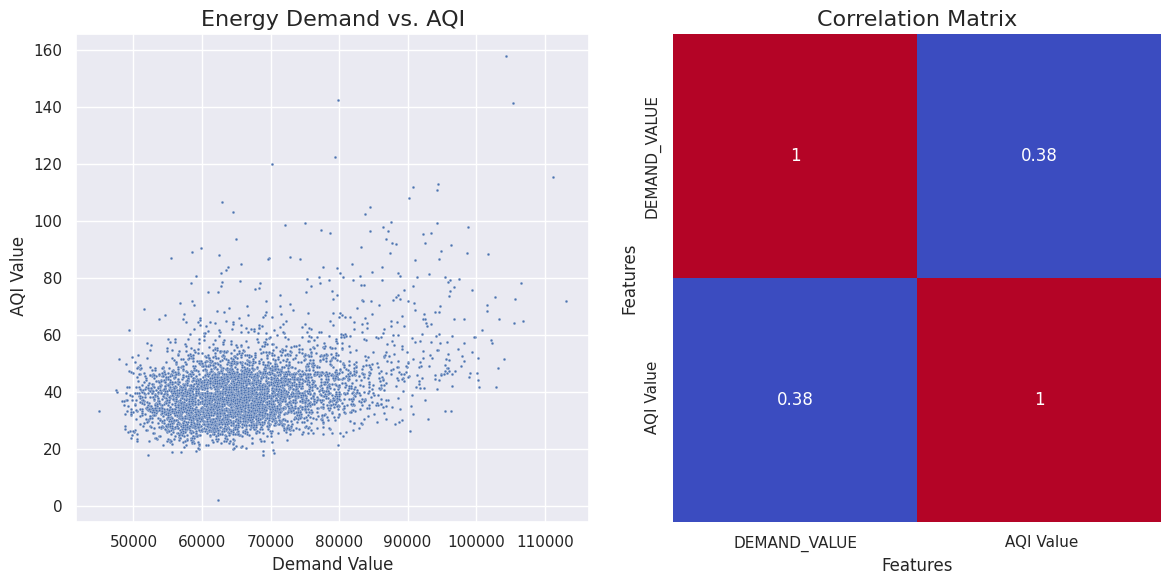

In [145]:
correlation = energyaqidf['DEMAND_VALUE'].corr(energyaqidf[' AQI Value'])
print("Correlation Coefficient:", correlation)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for scatter plot
sns.scatterplot(data=energyaqidf, x='DEMAND_VALUE', y=' AQI Value', s=4)  # Adjust 's' for dot size
plt.title('Energy Demand vs. AQI', fontsize=16)
plt.xlabel('Demand Value', fontsize=12)
plt.ylabel(' AQI Value', fontsize=12)

plt.subplot(1, 2, 2)  # Subplot for correlation matrix
correlation_matrix = energyaqidf[['DEMAND_VALUE', ' AQI Value']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True, cbar=False)
plt.title('Correlation Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)

plt.tight_layout()
plt.show()
